In [5]:
import pandas as pd

df = pd.read_csv("task.csv")
print(df.columns)


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


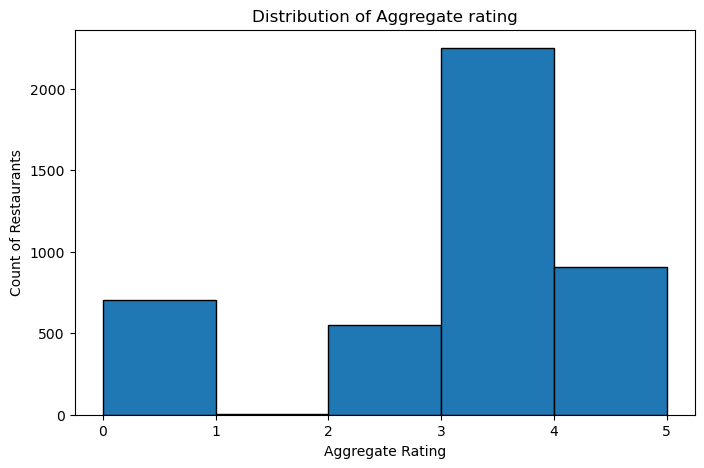

Most common rating range: [3, 4)
Average number of Votes: 230.26


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("task.csv")
df = df.dropna(subset=['Aggregate rating'])
plt.figure(figsize=(8,5))
plt.hist(df['Aggregate rating'], bins=[0,1,2,3,4,5], edgecolor='black')
plt.xlabel("Aggregate Rating")
plt.ylabel("Count of Restaurants")
plt.title("Distribution of Aggregate rating")
plt.show()
rating_bins = pd.cut(df['Aggregate rating'], bins=[0,1,2,3,4,5], right=False)
most_common_range = rating_bins.value_counts().idxmax()
print("Most common rating range:", most_common_range)
average_Votes = df['Votes'].mean()
print("Average number of Votes:", round(average_Votes, 2))


Most Common Cuisine Combinations:

Cuisines
North Indian                      354
North Indian, Chinese             212
Cafe                              146
North Indian, Mughlai             146
Fast Food                         132
Chinese                           126
Bakery                             89
Bakery, Desserts                   78
North Indian, Mughlai, Chinese     72
Mughlai                            50
Name: count, dtype: int64

Cuisine combinations with highest average ratings:

Cuisines
North Indian, South Indian, Mughlai    4.9
American, Caribbean, Seafood           4.9
European, German                       4.9
Italian, Bakery, Continental           4.9
Hawaiian, Seafood                      4.9
European, Asian, Indian                4.9
American, BBQ, Sandwich                4.9
Burger, Bar Food, Steak                4.9
BBQ, Breakfast, Southern               4.9
Continental, Indian                    4.9
Name: Aggregate rating, dtype: float64


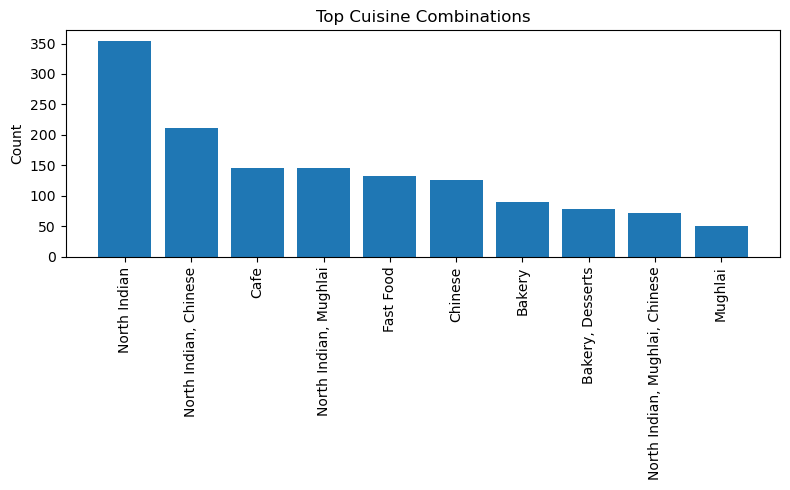

In [10]:
df = pd.read_csv("task.csv")
most_common_cuisines = df['Cuisines'].value_counts().head(10)
print("Most Common Cuisine Combinations:\n")
print(most_common_cuisines)
rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nCuisine combinations with highest average ratings:\n")
print(rating_by_cuisine.head(10))
plt.figure(figsize=(8,5))
plt.bar(most_common_cuisines.index, most_common_cuisines.values)
plt.xticks(rotation=90)
plt.title("Top Cuisine Combinations")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



Interactive map saved as 'restaurant_clusters_map.html'


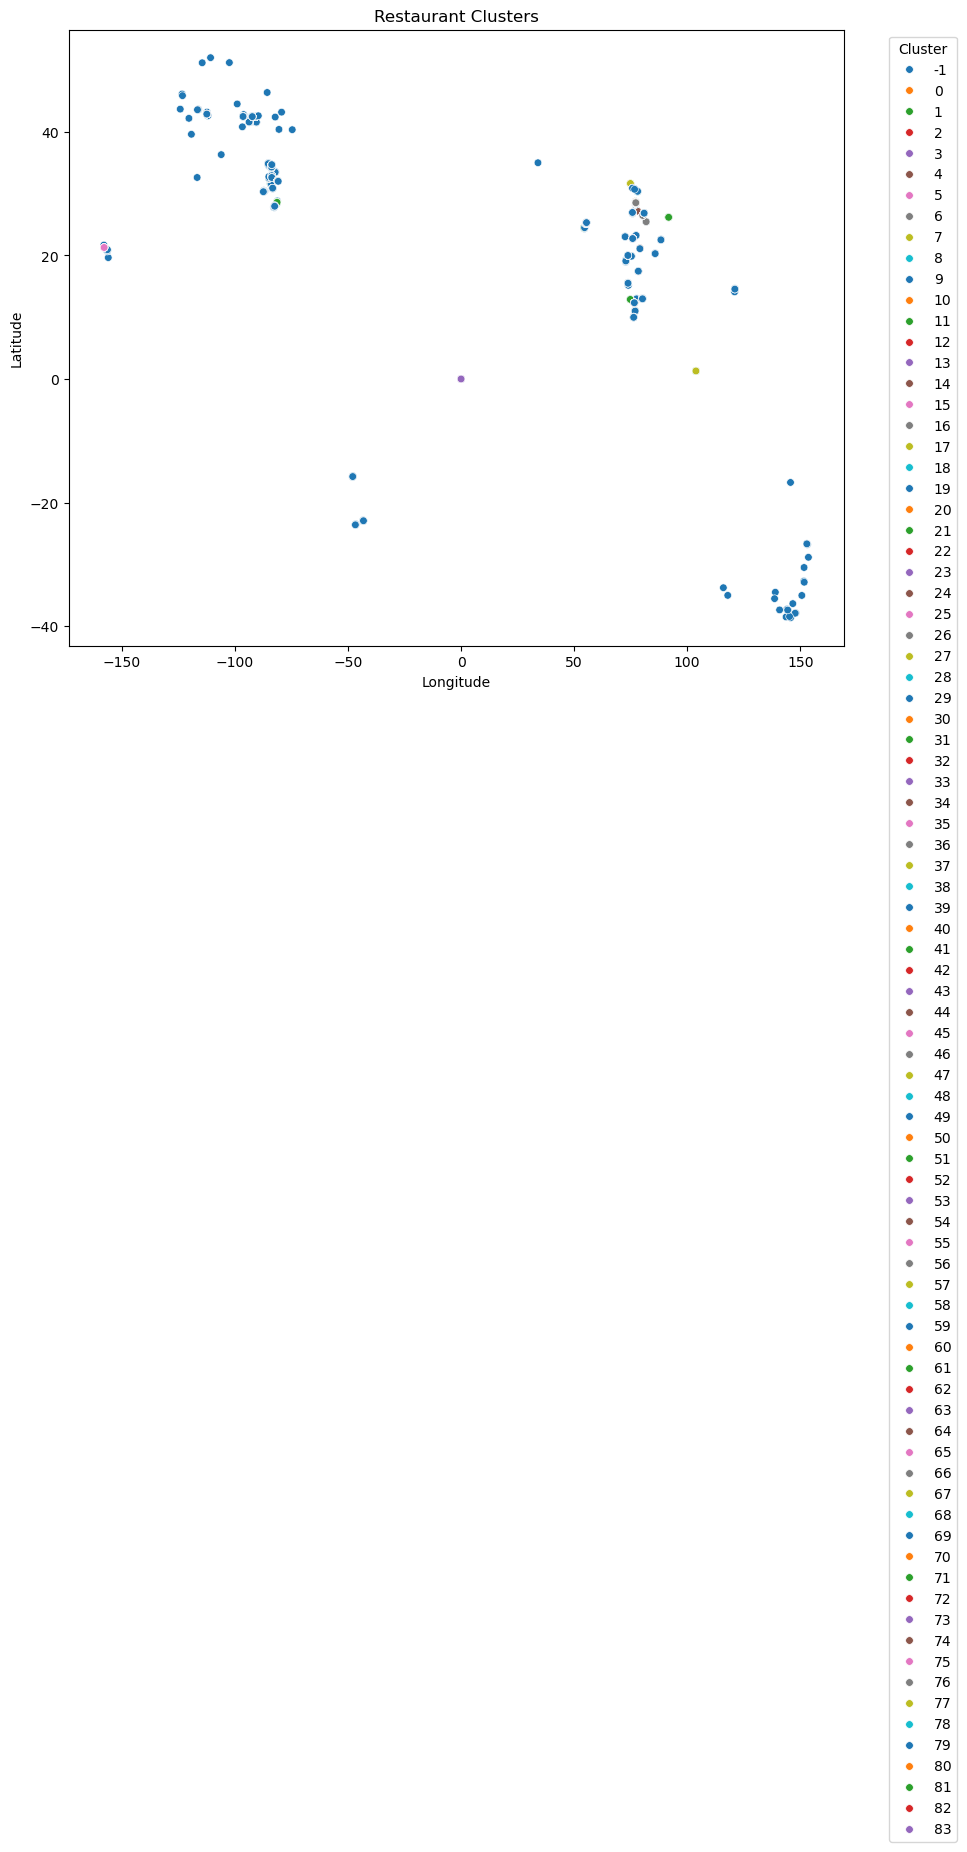

Cluster Summary:
Cluster
-1     734
 0       5
 1      15
 2      13
 3       7
      ... 
 79      5
 80     52
 81      5
 82     21
 83      8
Name: count, Length: 85, dtype: int64


In [23]:
import pandas as pd
import folium
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("task.csv")  
df = df[['Restaurant Name', 'Longitude', 'Latitude']]
df = df.dropna(subset=['Longitude', 'Latitude', 'Restaurant Name'])
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df = df.dropna(subset=['Longitude', 'Latitude'])
coords = df[['Latitude', 'Longitude']].to_numpy()
db = DBSCAN(eps=0.01, min_samples=5).fit(coords)  
df['Cluster'] = db.labels_
colors = sns.color_palette("tab10", n_colors=df['Cluster'].nunique()).as_hex()

map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)

for idx, row in df.iterrows():
    cluster = row['Cluster']
    if cluster == -1:  
        color = 'gray'
    else:
        color = colors[cluster % len(colors)]
    
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=str(row['Restaurant Name']) + " | Cluster: " + str(cluster)
    ).add_to(restaurant_map)

restaurant_map.save("restaurant_clusters_map.html")
print("Interactive map saved as 'restaurant_clusters_map.html'")

plt.figure(figsize=(10,8))
sns.scatterplot(
    x='Longitude', y='Latitude', hue='Cluster', data=df,
    palette='tab10', s=30
)
plt.title("Restaurant Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

cluster_summary = df['Cluster'].value_counts().sort_index()
print("Cluster Summary:")
print(cluster_summary)


Identified Restaurant Chains:
['Cafe Coffee Day', "Domino's Pizza", "McDonald's", 'Subway', 'Barbeque Nation', 'Green Chick Chop', "Dunkin' Donuts", 'Pizza Hut', "Haldiram's", 'Sagar Ratna', 'Starbucks', 'Keventers', 'Barista', 'Costa Coffee', 'Baskin Robbins', 'Giani', 'Chaayos', "Giani's", 'Pind Balluchi', 'Frontier', 'Moti Mahal Delux', 'Wah Ji Wah', 'KFC', 'Mocha', 'Burger Point', 'Republic of Chicken', 'Pizza Hut Delivery', 'Shree Rathnam', 'Bikaner Sweets', "Karim's", 'Sanjha Chulha', 'Burger King', 'Bikanervala', "Tibb's Frankie", 'Farzi Cafe', 'Faasos', 'Tpot', 'Behrouz Biryani', 'Viva Hyderabad', 'Shree Bikaner Misthan Bhandar', 'Apni Rasoi', "TGI Friday's", "Nando's", 'Punjabi Chaap Corner', "Chili's", 'Madras Cafe', 'Kettle & Kegs', "AB's - Absolute Barbecues", 'Ovenstory Pizza', 'Sardar A Pure Meat Shop', 'Momo-Cha', 'Yo! China', 'Burger Xpress', 'Texas Roadhouse', "Chawla's�_", 'Chai Point', 'Mainland China', 'Tea Villa Cafe', 'Southy', 'Shama Chicken Corner', "Nirula's Ic

C:\Users\hp\AppData\Local\Temp\ipykernel_18132\1836857372.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chain_ratings.head(10).values, y=chain_ratings.head(10).index, palette='viridis')


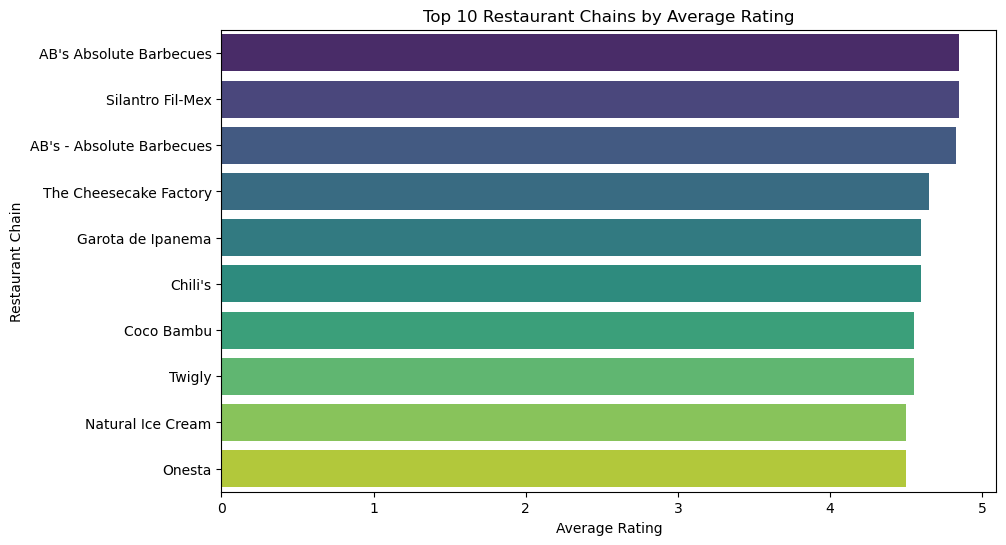

C:\Users\hp\AppData\Local\Temp\ipykernel_18132\1836857372.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chain_votes.head(10).values, y=chain_votes.head(10).index, palette='magma')


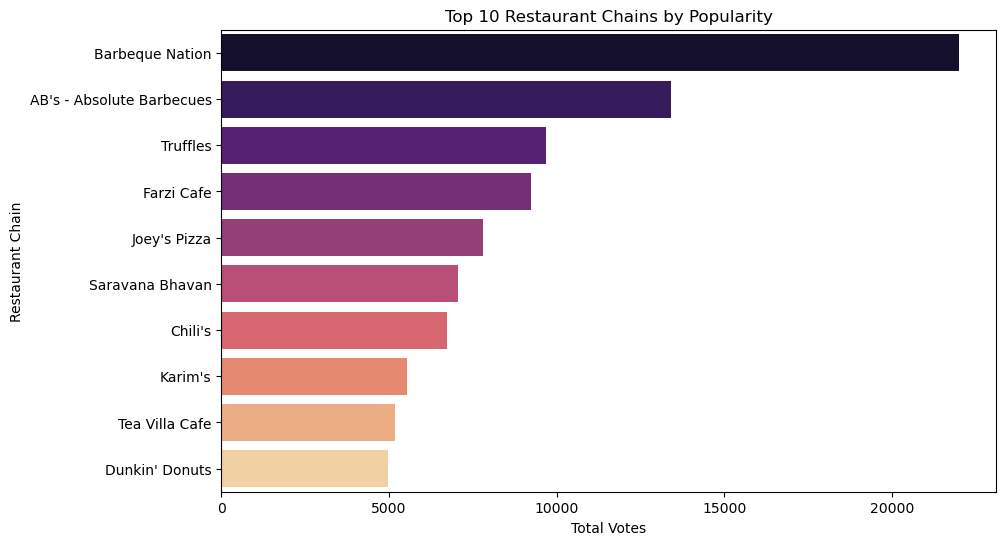

In [24]:
df = pd.read_csv("task.csv")
df = df[['Restaurant Name', 'City', 'Aggregate rating', 'Votes']]
chain_counts = df['Restaurant Name'].value_counts()
restaurant_chains = chain_counts[chain_counts > 1].index.tolist()
print("Identified Restaurant Chains:")
print(restaurant_chains)
df_chains = df[df['Restaurant Name'].isin(restaurant_chains)]

chain_ratings = df_chains.groupby('Restaurant Name')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nAverage Ratings of Chains:")
print(chain_ratings)
chain_votes = df_chains.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending=False)
print("\nTotal Votes (Popularity) of Chains:")
print(chain_votes)

plt.figure(figsize=(10,6))
sns.barplot(x=chain_ratings.head(10).values, y=chain_ratings.head(10).index, palette='viridis')
plt.xlabel("Average Rating")
plt.ylabel("Restaurant Chain")
plt.title("Top 10 Restaurant Chains by Average Rating")
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x=chain_votes.head(10).values, y=chain_votes.head(10).index, palette='magma')
plt.xlabel("Total Votes")
plt.ylabel("Restaurant Chain")
plt.title("Top 10 Restaurant Chains by Popularity")
plt.show()
